In [311]:
import os
import random
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [312]:
directory = "images/"
filename = directory + random.choice(os.listdir(directory))
print(filename)
filename = "images/4_Color.png"

images/9_Color.png


In [313]:
img = cv.imread(filename)
width = 10.
img = cv.resize(img, (1920, 1080))

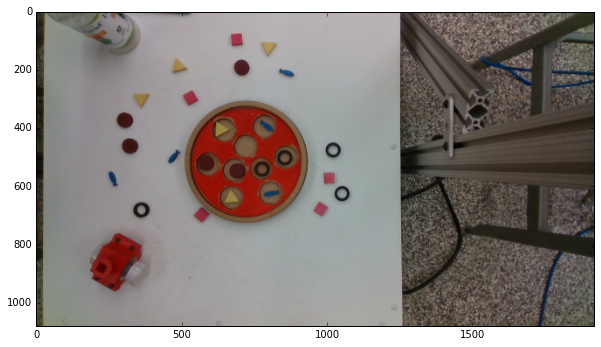

In [314]:
def showimg(image, cmap="gray"):
    plt.figure(figsize=(width, width*img.shape[0]/img.shape[1]))
    image_copy = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(image_copy, cmap=cmap, aspect='auto')
    plt.show()
showimg(img)

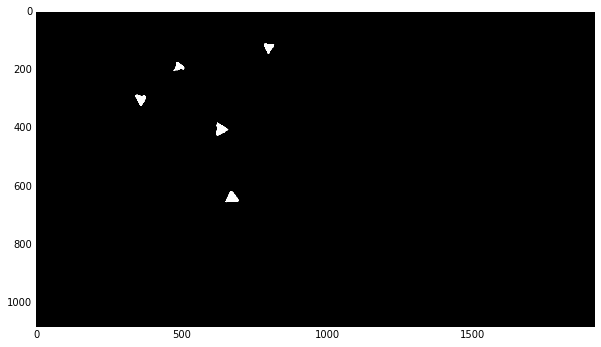

In [315]:
lower = np.array([20, 100, 100])
upper = np.array([30, 255, 255])
hsv_image = cv.cvtColor(img, cv.COLOR_BGR2HSV)
masked_hsv = cv.inRange(hsv_image, lower, upper)
showimg(masked_hsv)

In [316]:
retval, labels = cv.connectedComponents(masked_hsv)
print("num components: {}".format(retval))

num components: 7


(799, 124)


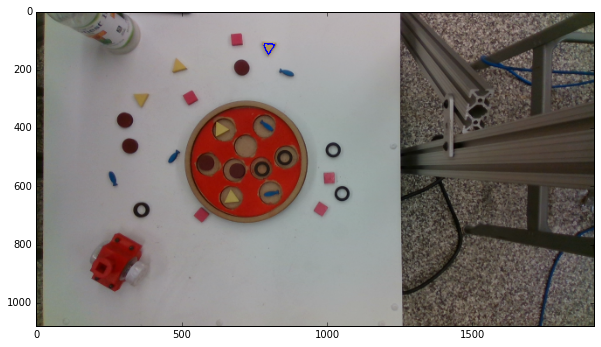

(490, 191)


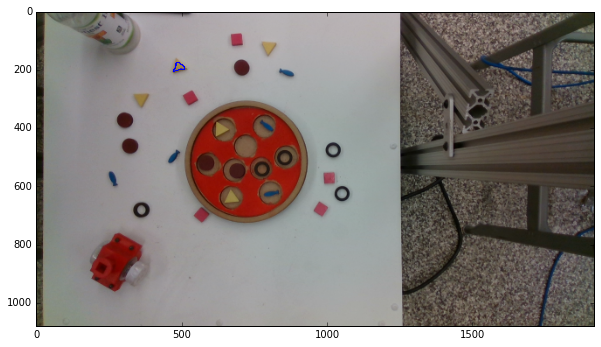

(359, 302)


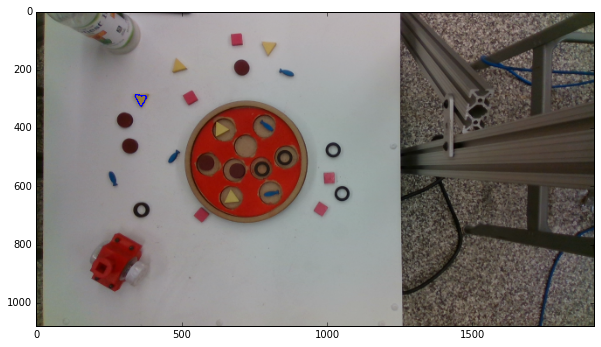

(633, 405)


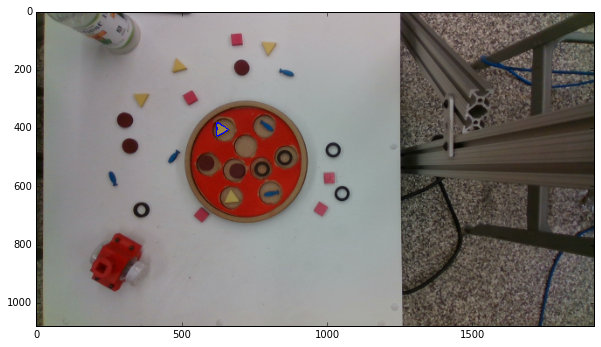

(672, 640)


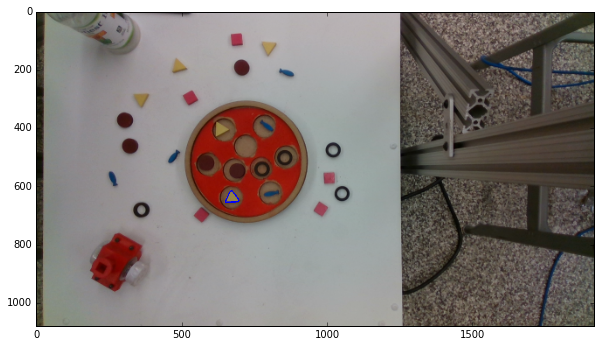

In [317]:
for label in range(retval):
    new_img = (labels == label).astype("int")
    if 500 < np.sum(new_img) < 100000:
        new_img = np.array(new_img*255, dtype=np.uint8)
        _, thresh = cv.threshold(new_img, 127, 255, cv.THRESH_BINARY)
        M = cv.moments(thresh)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        print(cX, cY)
        contours, _ = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
        img_copy = np.copy(img)
        img_copy = cv.drawContours(img_copy, contours, -1, [255, 0, 0], 4)
        showimg(img_copy)

In [308]:
contours, _ = cv.findContours(masked_hsv, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

for contour in contours:
    x,y,w,h = cv.boundingRect(contour)
    img_copy2 = np.copy(img_copy)
    cv.rectangle(img_copy2,(x,y),(x+w,y+h),(0,255,0),2)
    peri = cv.arcLength(contour, True)
    approx = cv.approxPolyDP(contour, 0.04 * peri, True)
    print(len(approx))
showimg(img_copy2)